**Dataset: Video Game Sales and Ratings**

<span style="font-size:20px; font-weight:bold;">Goal:</span>

- Upload Dataset
- Import Libraries
- Data Exploration
- Data Cleaning
- Data Analysis
- Visualization

__Import libraries__

In [291]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder # Encode features to make them numerical for Ml or statistical analysis


# Set renderer for troubleshooting
pio.renderers.default = "browser"  # Use "notebook" for Jupyter

pd.options.mode.chained_assignment = None  # default='warn'


__PART1: Let's explore the dataset__

In [292]:
df = pd.read_csv("Video_Games.csv")
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
# Get the shape of the dataframe 
df.shape

(16928, 17)

In [294]:
# Get information about the dataframe: missing values, type of columns....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [295]:
df.isnull().sum()

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

__How many games have both critic and user scores availabel?__

In [296]:
games_with_scores = df[["Critic_Score", "User_Score"]].dropna()
games_with_scores_count = games_with_scores.shape[0]
games_with_scores_count

8222

In [297]:
# Descriptive statistics of the dataset (only numnerical values)
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


__Second, let's ask some relevant questions to work on:__

- What publishers have the higher global sales?
- What Platforms have the higher global sales?
- What Genre have the higher global sales?
- What features correlates with high user score?

__What publishers have the higher global_sales?__

In [298]:
df[["Publisher", "Global_Sales"]].isnull().sum()

Publisher       55
Global_Sales     0
dtype: int64

Check for misising values in Publisher and Global_Sales columns

In [299]:
# Checking for misisng values in 'Publisher' and 'Global_Sales' columns
missing_values = df[['Publisher', 'Global_Sales']].isnull().sum()
print(missing_values)

Publisher       55
Global_Sales     0
dtype: int64


Drop observations with null values in Publisher column and get the top 10 Publishers by Global Sales

In [300]:
# Exclude rows with missing publisher information
video_games_cleaned_df = df.dropna(subset=["Publisher"])

# Aggregate global sales by publisher
publisher_sales = video_games_cleaned_df.groupby("Publisher")['Global_Sales'].sum().sort_values(ascending=False)

# Display the top 10 publishers by global sales
top_publishers = publisher_sales.head(10)
print("Top Publishers by Global Sales:\n", top_publishers)


Top Publishers by Global Sales:
 Publisher
Nintendo                        1830.35
Electronic Arts                 1155.88
Activision                       742.39
Sony Computer Entertainment      634.45
Ubisoft                          493.05
Take-Two Interactive             406.92
THQ                              342.74
Konami Digital Entertainment     284.90
Sega                             275.89
Namco Bandai Games               260.85
Name: Global_Sales, dtype: float64


Visualize the top 10 Publishers

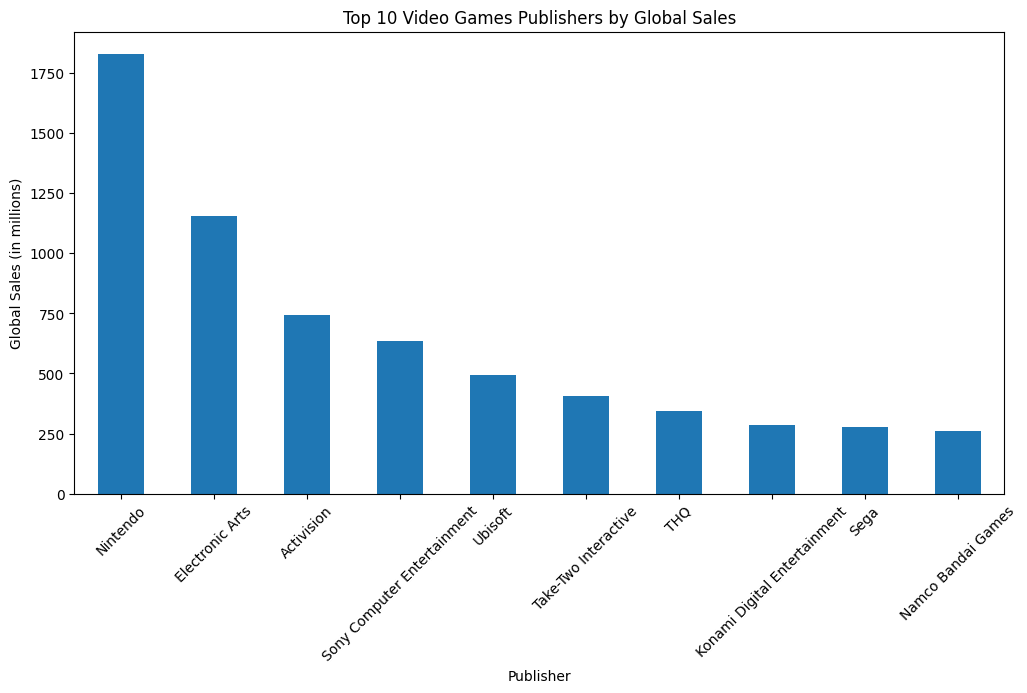

In [301]:
# Visualization
plt.figure(figsize=(12, 6))
top_publishers.plot(kind="bar")
plt.title("Top 10 Video Games Publishers by Global Sales")
plt.xlabel("Publisher")
plt.ylabel("Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

**What Platforms have the highest global sales**

In [302]:
# Check for missing values in Platform
missing_values_platoform = video_games_cleaned_df[["Platform", "Global_Sales"]].isnull().sum()
missing_values_platoform

Platform        0
Global_Sales    0
dtype: int64

In [303]:
# Aggredate global sales by platform
platform_sales = video_games_cleaned_df.groupby("Platform")['Global_Sales'].sum().sort_values(ascending=False)

# Display the top 10 publishers by global sales
top_platforms = platform_sales.head(10)
print("Top Platfrom by Global Sales:\n", top_platforms)

Top Platfrom by Global Sales:
 Platform
PS2     1279.87
X360     988.31
PS3      962.16
Wii      936.92
DS       813.61
PS       758.29
PS4      324.48
GBA      318.90
PSP      297.84
3DS      271.19
Name: Global_Sales, dtype: float64


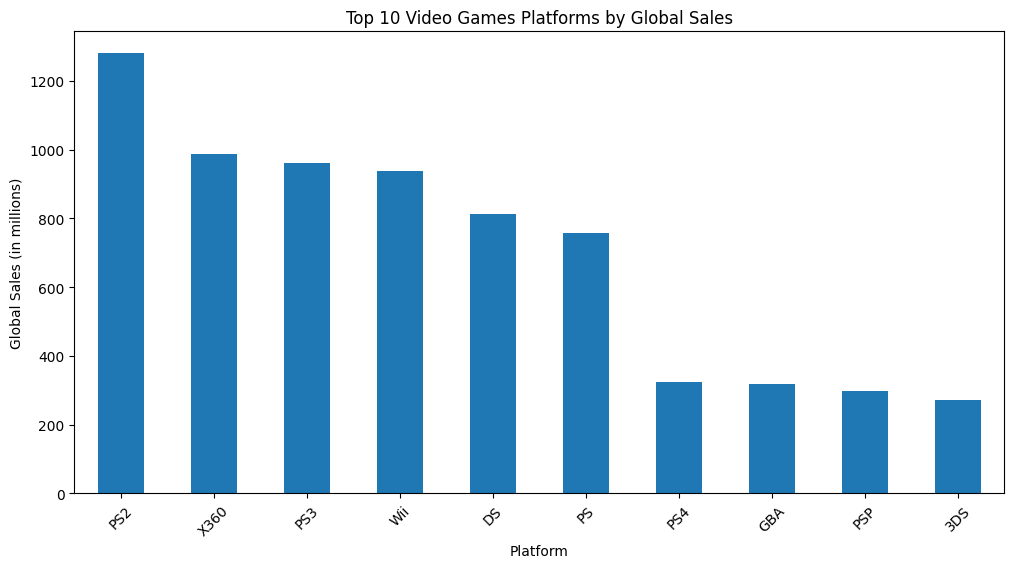

In [304]:
# Visualization
plt.figure(figsize=(12, 6))
top_platforms.plot(kind="bar")
plt.title("Top 10 Video Games Platforms by Global Sales")
plt.xlabel("Platform")
plt.ylabel("Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

__What Genre have the highest Global Sales?__

In [305]:
# Check for missing values in Genre
missing_values_genre = video_games_cleaned_df[["Genre", "Global_Sales"]].isnull().sum()
missing_values_genre

Genre           2
Global_Sales    0
dtype: int64

In [306]:
# Drop missing Genre
cleaned_genre = video_games_cleaned_df.dropna(subset=["Genre"])

# Aggregate global sales by genre
genre_sales = cleaned_genre.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

# Display top 10 genre by global sales
top_genres = genre_sales.head(10)

# Visualization using Plotly
fig = px.bar(
    top_genres,
    x=top_genres.index,
    y=top_genres.values,
    title="Top Genres by Global Sales",
)

# # Set axis labels
fig.update_layout(xaxis_title="Genre", yaxis_title="Global Sales (in millions)")
fig.show()




**What features correlates with high user_score?**

In [307]:
df

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,16923,Aliens: Colonial Marines,PS3,2013.0,Shooter,Sega,0.20,0.29,0.00,0.11,0.60,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003.0,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.60,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011.0,Shooter,Sega,0.09,0.06,0.42,0.03,0.60,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005.0,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.60,88.0,48.0,8.8,27.0,EA Sports,T


In [308]:

# Let's Encode Non-numerical datas

# Dictionary to store LabelEncoders
label_encoders = {}

# # Loop through each column in the DataFrame
for column in df.columns:
    # Initialize LabelEncoder
    le = LabelEncoder()
    # Check if the column is of object type (categorical)
    if df[column].dtype == 'object':
        # Convert object type columns to categorical type
        df[column] = df[column].astype('category')
        # Apply Label Encoding on categorical columns
        df[column] = le.fit_transform(df[column])  # Encode the column
        label_encoders[column] = le                # Save the encoder for later use
     


In [309]:
label_encoders["Genre"].classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

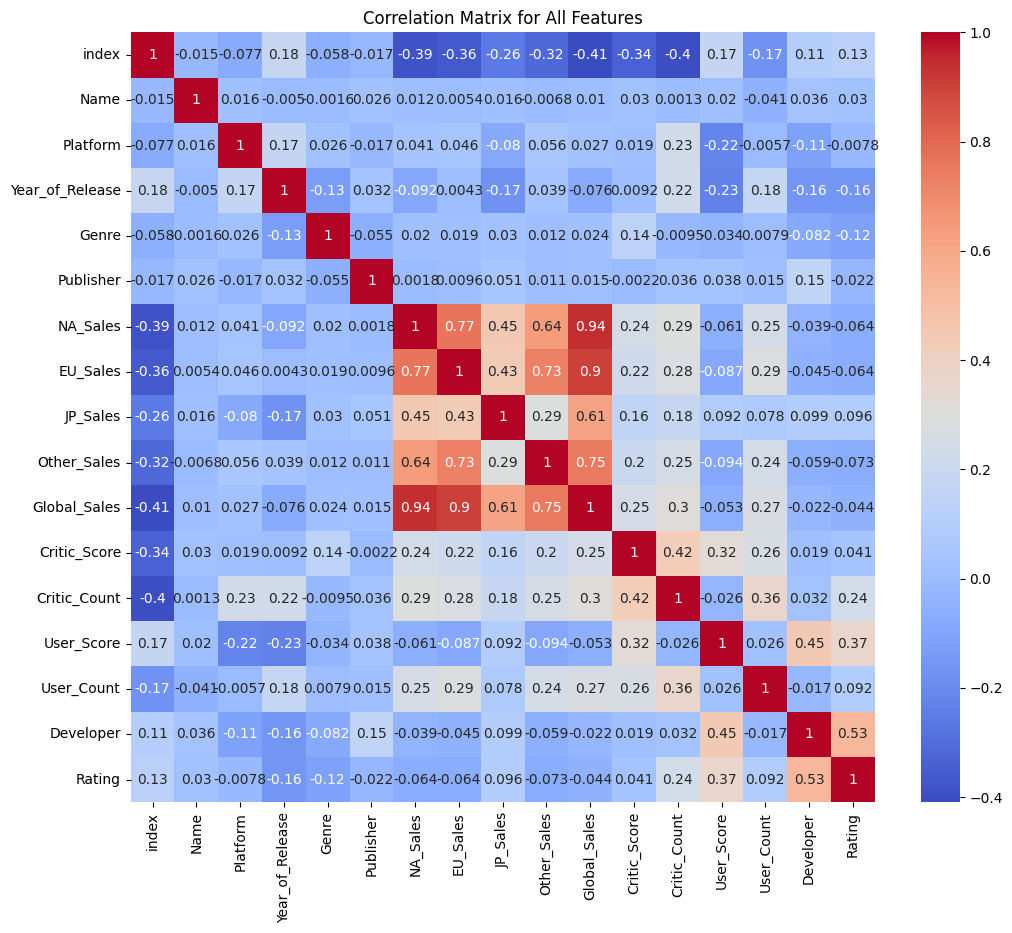

In [310]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for All Features")
plt.show()

Now let's check correlation of some specific columns only

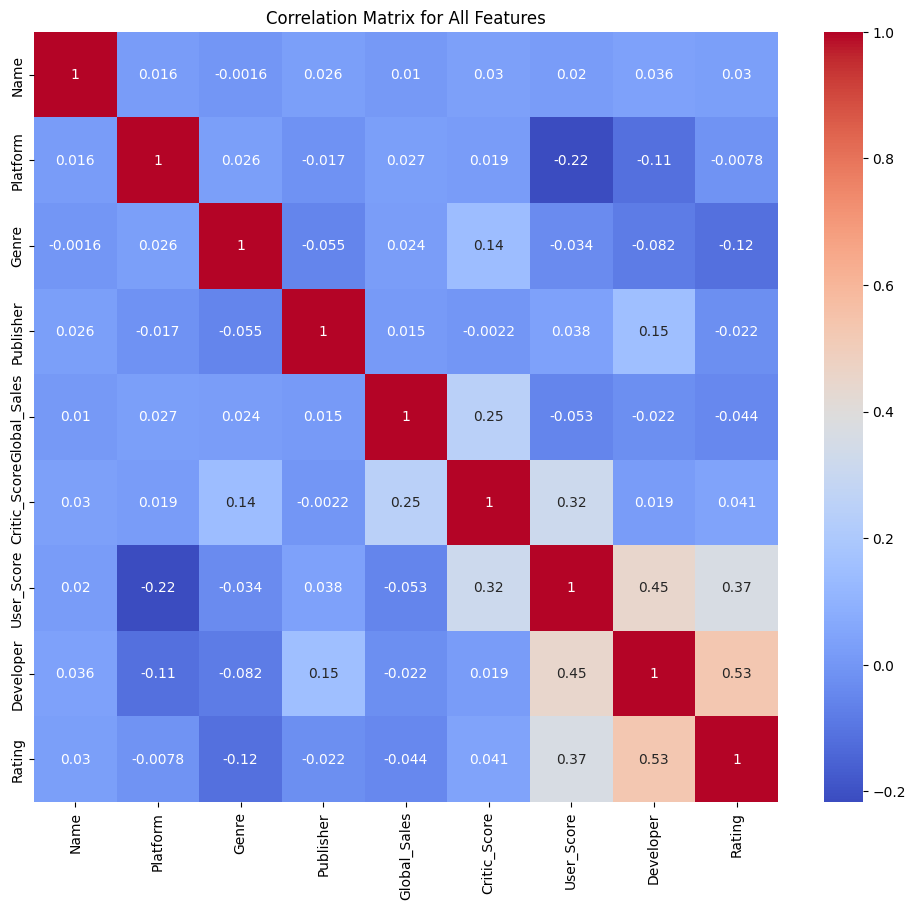

In [311]:
# Select only the specified columns
selected_columns = ["Name", "Platform", "Genre", "Publisher", "Global_Sales", "Critic_Score", "User_Score", "Developer", "Rating"]
df_selected = df[selected_columns].copy()

# # Convert 'User_Score' to numeric, treating 'tbd' as Nan
# df_selected["User_Score"] = pd.to_numeric(df_selected["User_Score"], errors='coerce')

# # Initialize LabelEncoder
# le = LabelEncoder()

# # Dictionary to store LabelEncoder for each column
# label_encoders = {}

# # Loop through each column in the DataFrame
# for column in df_selected.columns:
#     # Check if the column is of object type (categorical)
#     if df_selected[column].dtype == 'object':
#         # Convert object type columns to categorical type
        # df_selected[column] = df_selected[column].astype('category')
        # # Apply Label Encoding on categorical columns
        # df_selected[column] = le.fit_transform(df_selected[column].cat.codes.replace(-1, np.nan))
        
#         label_encoders[column] = le  # Save the encoder for later use


# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for All Features")
plt.show()

The above Correlation Matrix shows that `Rating` correlates with `Developer` with 0.53. While there is no much correlation with other features.

**PART 2**

- **Trend Over Time**: Examine how video game sales have changed over the years. Identify periods of significant growth or decline.

- **Regional Preferences**: Compare the popularity of genres or platform across different regions(NA, EU, JP, etc.).

- **Correlation Between Critic and User Scores**: Explore how closely user opinions align with professional critics.

**Examine how video game sales have changed over the years. Identify peroids of significant growth or decline.**

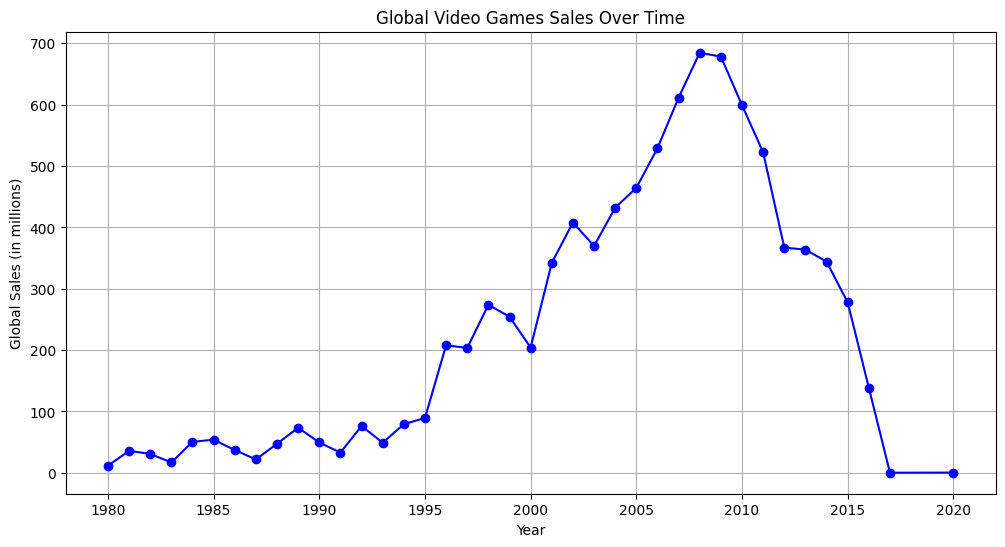

In [312]:
# Filter out rows where 'Year_of_Release' is Nan
video_games_df_filtered = df.dropna(subset=["Year_of_Release"])

# # Convert 'Year_of_Release' to interger a s it represents years
video_games_df_filtered["Year_of_Release"] = video_games_df_filtered["Year_of_Release"].astype(int)
video_games_df_filtered["Year_of_Release"]
# # Aggregate global sales by year
yearly_sales = video_games_df_filtered.groupby('Year_of_Release')["Global_Sales"].sum()

# Plotting global sales by year
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind="line", color="blue", marker="o")
plt.title("Global Video Games Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.grid(True)
plt.show()

The line graph above illustrates the global video games sales trends over time, from 1980 to 2020. Here are some observations:

- Growth Periods: There's noticeable grownth in sales starting in the mid-1990s, peaking arond 2008.
- Peak Sales: The highest global sales occcured in 2008.
- Decline in Sales: After 2008, there's a consistent decline in global sales.
- Recent Years: The datasets includes very limioted data for years after 2016, which exlpains the low sales figures for 2017 and 2022.

This analysis highlights key periods in the video game industry, particularly the rapid growth phase in the early 2000s and the subsequent decline after 2008. The decline cound be attributed to various factor as market saturation, the rise of mobile gaming changes in consumer preferences, or even incomplete data from recent years.

**Compare the popularity of genres or platform across different regions(NA, EU, JP, etc.).**

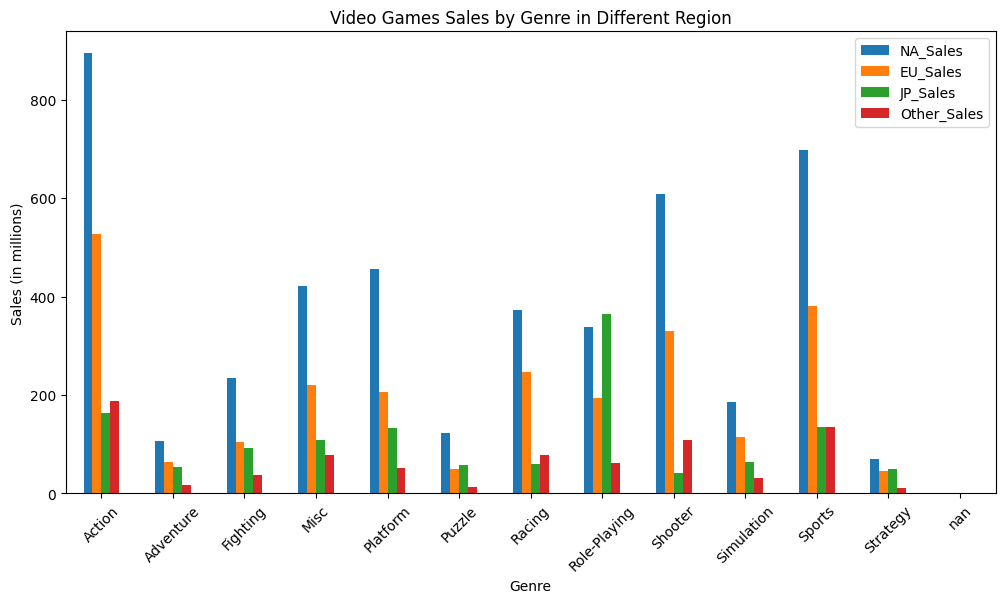

In [316]:
region_genre_sales = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Decode Genre labels for the plot
decoded_genres = label_encoders["Genre"].inverse_transform(region_genre_sales.index)
# Plotting Sales by Region and Genre with Decoded Labels
region_genre_sales.index = decoded_genres  # Temporarily set decoded labels for the plot
# Plotting Sales by region and genre
region_genre_sales.plot(kind="bar", figsize=(12, 6))
plt.title("Video Games Sales by Genre in Different Region")
plt.xlabel("Genre")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

****Regional Insight:****

- **North America(NA)**: NA has the highest sales in most genres, indicating a large market for Video games. Action, Shooter, and Sports genres are particularly popular.

- **Europe(EU)**: Similar to NA, EU also shows a strong preference for Action and Shooter games, with Sports also being popular.

- **Japan(JP)**: Japan stands out with its high sales of Role-Playing games, which is a cultural preference. Other genres like Action and Platforms also do well.

- **Other Regions**: The sales pattern in Other regions seems to follow NA and EU trends but a lower scale. 

**Correlation Between Critic and User Scores: Explore how closely user opinions align with professional critics.**

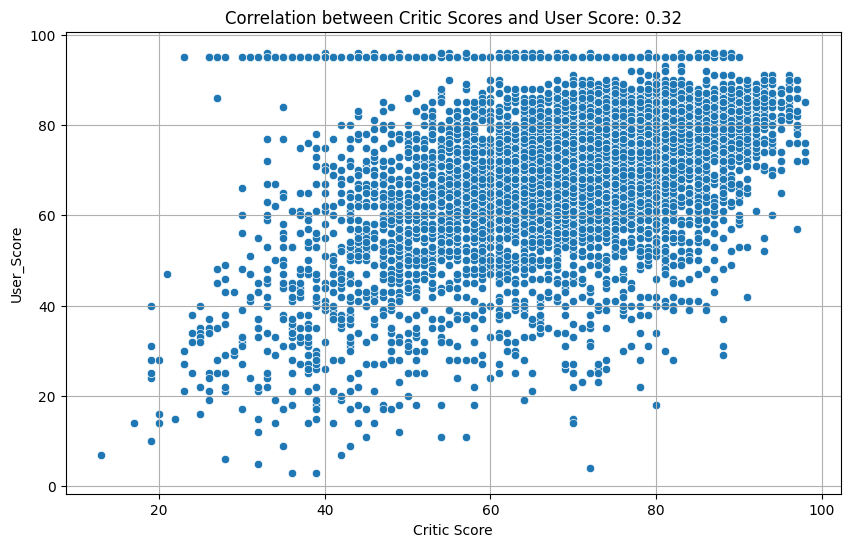

In [319]:
# Filter Out rows where Critic_Score or User_Score is NaN
video_games_scores_df = df.dropna(subset=["Critic_Score", "User_Score"])

# Convert 'User_Score' to numeric, if i's not already
video_games_scores_df['User_Score'] = pd.to_numeric(video_games_scores_df["User_Score"], errors="coerce")

# Drop any rows that still have Nan values after conversion
video_games_scores_df.dropna(subset=["User_Score"], inplace=True)


# Calculate the correlation coeeficient
correlation = video_games_scores_df["Critic_Score"].corr(video_games_scores_df["User_Score"])


# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Critic_Score", y="User_Score", data=video_games_scores_df)
plt.title(f"Correlation between Critic Scores and User Score: {correlation:.2f}")
plt.xlabel("Critic Score")
plt.ylabel("User_Score")
plt.grid(True)
plt.show()

The above Correlation of 0.32 between `Critic_Score` and `User_Score` indicates a weak positive relationship between the two variables. In other words, as the Critic_Score increases, the User_Score tends to increase slightly as well, but the relationship is not very strong.

**Insight:**

A correlation of **0.32** is considered a weak positive correlation.
- This means that while there is a trend where higher `Critic_Score` tends to be associated with higher `User_Score`, the relationship is not very strong. Many other factors could influence `User_Score` that are not captured by the `Critic_Score`.

- A correlation of 0.32 suggests that while there is some level of agreement between critics and users, it is far from perfect and might be influenced by other factors, like personal preferences, game genre, or review biases.